INSTALLING DEPENDENCIES

In [6]:
import os,warnings;warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',font_scale=0.8)
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score

Dataset importing

In [9]:
#loading csv data into pandas dataframe
heart_data = pd.read_csv('/Users/rad7/Documents/Desktop/AIML lab/MINI PROJECT/Dataset/CVD_cleaned.csv')

In [11]:
#printing the rows
heart_data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [13]:
#printing the last rows
heart_data.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0


In [15]:
#finding the shape of the dataset
heart_data.shape

(308854, 19)

In [17]:
#getting some info abput the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [19]:
#checking the missing values
heart_data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [21]:
#statistical measure
display(heart_data.describe().round(2))

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.00,308854.00,308854.00,308854.0,308854.00,308854.00,308854.00
mean,170.62,83.59,28.63,5.1,29.84,15.11,6.30
std,10.66,21.34,6.52,8.2,24.88,14.93,8.58
min,91.00,24.95,12.02,0.0,0.00,0.00,0.00
25%,163.00,68.04,24.21,0.0,12.00,4.00,2.00
50%,170.00,81.65,27.44,1.0,30.00,12.00,4.00
75%,178.00,95.25,31.85,6.0,30.00,20.00,8.00
max,241.00,293.02,99.33,30.0,120.00,128.00,128.00


In [23]:
#checking the target variable distribution
heart_data['Heart_Disease'].value_counts()

Heart_Disease
No     283883
Yes     24971
Name: count, dtype: int64

In [25]:
# Convert all Yes/No columns to 0/1
Yes_No_Columns = ['Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression','Arthritis','Smoking_History']
heart_data[Yes_No_Columns] =heart_data[Yes_No_Columns].apply(lambda x: x.map({"Yes": 1, "No": 0}))

In [27]:
#checking the target variable distribution
heart_data['Heart_Disease'].value_counts()

Heart_Disease
0    283883
1     24971
Name: count, dtype: int64

In [29]:
heart_data.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [31]:
heart_data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,Female,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,Female,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,Female,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1,1,0,0,0,Yes,0,Male,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0,0,0,0,0,No,0,Male,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [33]:
#converting sex columns
heart_data['Sex'].value_counts()

Sex
Female    160196
Male      148658
Name: count, dtype: int64

In [35]:
#replacing
heart_data['Sex'] =heart_data['Sex'].replace({"Male": 1, "Female": 0})

In [37]:
heart_data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1,1,0,0,0,Yes,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0,0,0,0,0,No,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [39]:
#converting sex columns
columns = ['General_Health','Checkup','Diabetes','Age_Category']
for column in columns: 
    print('*'*80)
    print(heart_data[column].value_counts())

********************************************************************************
General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64
********************************************************************************
Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64
********************************************************************************
Diabetes
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
Name: count, dtype: int64
********************************************************************************
Age_Category
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25

Since this is an ordinal categorical variable (ordered levels: Excellent > Very Good > Good > Fair > Poor)

In [42]:
#Mapping the General_Health_Column
general_health_mapping = {
    "Excellent": 5,
    "Very Good": 4,
    "Good": 3,
    "Fair": 2,
    "Poor": 1
}
heart_data["General_Health"] = heart_data["General_Health"].map(general_health_mapping)

Since medical checkups follow an ordered frequency, we can also encode them ordinally

In [45]:
#Mapping Checkup_details

checkup_mapping = {
    "Within the past year": 5,
    "Within the past 2 years": 4,
    "Within the past 5 years": 3,
    "5 or more years ago": 2,
    "Never": 1
}
heart_data["Checkup"] = heart_data["Checkup"].map(checkup_mapping)

Diabetes (Re-Categorization & Encoding)
"No" → 0,
"Yes" → 1,
Other conditions can be grouped into 0.5 (for borderline cases).

In [48]:
#diabetes mapping
diabetes_mapping ={
    "No": 0,
    "Yes": 1,
    "No, pre-diabetes or borderline diabetes": 0.5,
    "Yes, but female told only during pregnancy": 0.5
    }
heart_data["Diabetes"] = heart_data["Diabetes"].map(diabetes_mapping)

Since age groups are ordered, you can map them to numeric values:

In [51]:
#Age_Category 
age_mapping = {
    "18-24": 1, "25-29": 2, "30-34": 3, "35-39": 4, "40-44": 5,
    "45-49": 6, "50-54": 7, "55-59": 8, "60-64": 9, "65-69": 10,
    "70-74": 11, "75-79": 12, "80+": 13
}
heart_data["Age_Category"] = heart_data["Age_Category"].map(age_mapping)


In [53]:
heart_data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,4,0,0,0,0,0,0.0,1,0,11,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,4,5,0,1,0,0,0,1.0,0,0,11,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,4,5,1,0,0,0,0,1.0,0,0,9,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,1,5,1,1,0,0,0,1.0,0,1,12,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,3,5,0,0,0,0,0,0.0,0,1,13,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [55]:
#Since the target variable is heavily we will balance it using SMOTE
from imblearn.over_sampling import SMOTE

# Define target and features
X = heart_data.drop(columns=["Heart_Disease"])
y = heart_data["Heart_Disease"]

from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a balanced DataFrame
heart_data = pd.DataFrame(X_resampled, columns=X.columns)
heart_data["Heart_Disease"] = y_resampled

# Check the new distribution
print(heart_data["Heart_Disease"].value_counts())

Heart_Disease
0    283883
1    283883
Name: count, dtype: int64


In [56]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567766 entries, 0 to 567765
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                567766 non-null  int64  
 1   Checkup                       567766 non-null  int64  
 2   Exercise                      567766 non-null  int64  
 3   Skin_Cancer                   567766 non-null  int64  
 4   Other_Cancer                  567766 non-null  int64  
 5   Depression                    567766 non-null  int64  
 6   Diabetes                      567766 non-null  float64
 7   Arthritis                     567766 non-null  int64  
 8   Sex                           567766 non-null  int64  
 9   Age_Category                  567766 non-null  int64  
 10  Height_(cm)                   567766 non-null  float64
 11  Weight_(kg)                   567766 non-null  float64
 12  BMI                           567766 non-nul

In [61]:
heart_data.to_csv("/Users/rad7/Documents/Desktop/AIML lab/MINI PROJECT/Dataset/processed_CVD_data.csv", index=False)

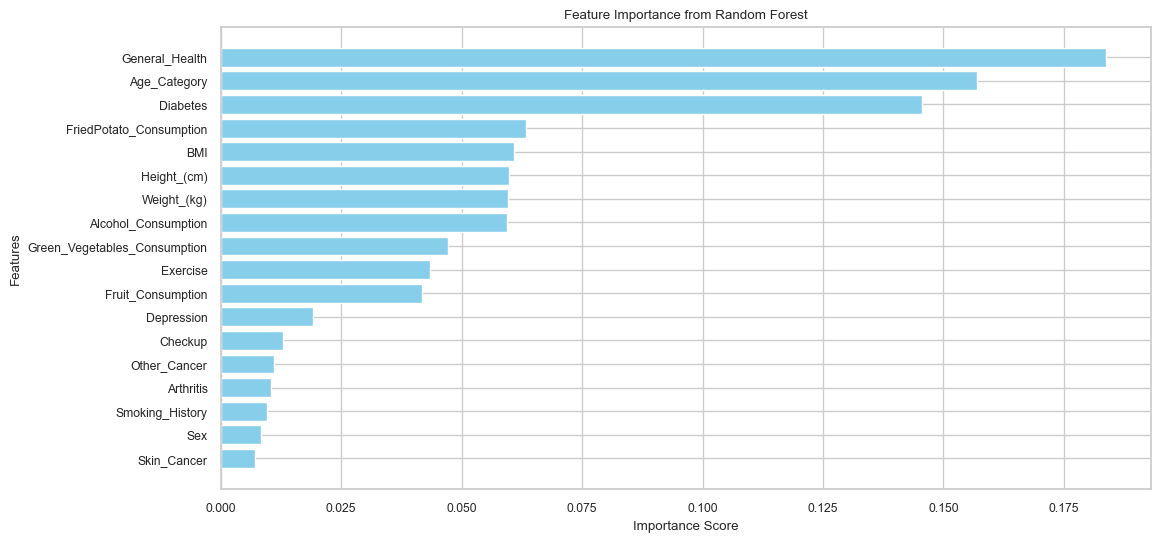